# Notebook to check if the beersheba processing has worked as intended

Two main tasks
- Check if the energy corrections were applied as expected.
- Check that the events look somewhat normal.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import tables as tb
from matplotlib import colors 

from typing          import Optional
from typing          import Union
from typing          import Callable

import sys,os,os.path
sys.path.append("/gluster/data/next/software/IC_311024/")
sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
#sys.path.append("/home/e78368jw/Documents/NEXT_CODE/next_misc/")
os.environ['ICTDIR']='/gluster/data/next/software/IC_311024/'

from invisible_cities.io.dst_io           import load_dst, load_dsts, df_writer
from invisible_cities.io.hits_io          import hits_writer
from invisible_cities.core                import tbl_functions   as tbl
from invisible_cities.core.core_functions import in_range
from invisible_cities.cities.beersheba    import hitc_to_df_
from invisible_cities.io.hits_io          import hits_from_df
from invisible_cities.evm.nh5             import HitsTable
from invisible_cities.types.symbols       import NormStrategy
from invisible_cities.types.ic_types      import NoneType
from invisible_cities.reco.corrections    import read_maps, get_df_to_z_converter, apply_all_correction
from invisible_cities.evm.event_model     import HitCollection

from tqdm import tqdm

import functions_HE as func

%load_ext autoreload
%autoreload 2

# Defaults

In [3]:
RUN_NUMBER = 15107
TIMESTAMP  = 140425

# load in hits

just ldc1 for the timebeing, easy to scale up for 7 ldcs

In [ ]:
# just ldc1
folder_path = f'/gluster/data/next/files/TOPOLOGY_John/N100_data/{RUN_NUMBER}/beersheba/{TIMESTAMP}/ldc1/'
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.endswith('.h5')]

hdst = []
for file in tqdm(file_names):
    try:
        hdst.append(load_dst(folder_path + file, 'DECO', 'Events'))
    except Exception as e:
        print(f'File {file} broke with error:\n{e}')
hdst = pd.concat(hdst)

In [5]:
# whole thing
n100_dir = f'/gluster/data/next/files/TOPOLOGY_John/N100_data/{RUN_NUMBER}/beersheba/{TIMESTAMP}/'

hdst = []

for i in tqdm(range(1,8)):
    print(f"LDC {i}")
    folder_path = n100_dir + 'ldc' + str(i) + '/'
    file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.endswith('.h5')]
    for file in tqdm(file_names):
        try:
            hdst.append(load_dst(folder_path + file, 'DECO', 'Events'))
        except Exception as e:
            print(f'File {file} broke with error:\n{e}')        

hdst = pd.concat(hdst)

  0%|          | 0/7 [00:00<?, ?it/s]

LDC 1


File run_15107_0676_ldc1_1401425.h5 broke with error:
group ``/`` does not have a child named ``DECO``


File run_15107_0876_ldc1_1401425.h5 broke with error:
group ``/`` does not have a child named ``DECO``


 14%|█▍        | 1/7 [03:23<20:22, 203.76s/it]

LDC 2


 29%|██▊       | 2/7 [07:26<18:54, 226.89s/it]

LDC 3


File run_15107_1123_ldc3_140125.h5 broke with error:
HDF5 error back trace

  File "H5D.c", line 1069, in H5Dread
    can't synchronously read data
  File "H5D.c", line 1013, in H5D__read_api_common
    can't read data
  File "H5VLcallback.c", line 2092, in H5VL_dataset_read_direct
    dataset read failed
  File "H5VLcallback.c", line 2048, in H5VL__dataset_read
    dataset read failed
  File "H5VLnative_dataset.c", line 361, in H5VL__native_dataset_read
    can't read data
  File "H5Dio.c", line 370, in H5D__read
    can't read data
  File "H5Dchunk.c", line 2863, in H5D__chunk_read
    unable to read raw data chunk
  File "H5Dchunk.c", line 4499, in H5D__chunk_lock
    data pipeline read failed
  File "H5Z.c", line 1384, in H5Z_pipeline
    filter returned failure during read
  File "H5Zdeflate.c", line 117, in H5Z__filter_deflate
    inflate() failed

End of HDF5 error back trace

Problems reading records.


 43%|████▎     | 3/7 [11:21<15:21, 230.26s/it]

LDC 4


File run_15107_1355_ldc4_140125.h5 broke with error:
group ``/`` does not have a child named ``DECO``


 57%|█████▋    | 4/7 [15:19<11:40, 233.46s/it]

LDC 5


 71%|███████▏  | 5/7 [19:33<08:01, 240.93s/it]

LDC 6


 86%|████████▌ | 6/7 [23:55<04:07, 247.88s/it]

LDC 7


100%|██████████| 7/7 [28:21<00:00, 243.02s/it]


 60%|█████▉    | 2000/3355 [01:55<01:13, 18.52it/s]

File run_15107_0676_ldc1_1401425.h5 broke with error:
group ``/`` does not have a child named ``DECO``


 63%|██████▎   | 2099/3355 [02:02<01:34, 13.27it/s]

File run_15107_0876_ldc1_1401425.h5 broke with error:
group ``/`` does not have a child named ``DECO``


100%|██████████| 3355/3355 [03:40<00:00, 15.22it/s]


In [7]:
display(hdst)

,event,npeak,X,Y,Z,E,Xpeak,Ypeak,time,nsipm,Xrms,Yrms
0,2767,0.0,-343.875,-16.175,1325.987577,0.000030,-160.956322,-11.514155,1.742935e+09,0,0,0
1,2767,0.0,-343.875,-13.675,1325.987577,0.000032,-160.956322,-11.514155,1.742935e+09,0,0,0
2,2767,0.0,-343.875,-11.175,1325.987577,0.000031,-160.956322,-11.514155,1.742935e+09,0,0,0
3,2767,0.0,-341.375,-21.175,1325.987577,0.000028,-160.956322,-11.514155,1.742935e+09,0,0,0
4,2767,0.0,-341.375,-18.675,1325.987577,0.000038,-160.956322,-11.514155,1.742935e+09,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12740,2328174,18.0,1.125,-356.175,1725.468658,0.000035,-1.678470,-129.576151,1.742965e+09,0,0,0
12741,2328174,18.0,1.125,-353.675,1725.468658,0.000030,-1.678470,-129.576151,1.742965e+09,0,0,0
12742,2328174,18.0,1.125,-351.175,1725.468658,0.000017,-1.678470,-129.576151,1.742965e+09,0,0,0
12743,2328174,18.0,3.625,-356.175,1725.468658,0.000015,-1.678470,-129.576151,1.742965e+09,0,0,0


# plot energy spectra per event

Text(0.5, 0, 'Energy (MeV)')

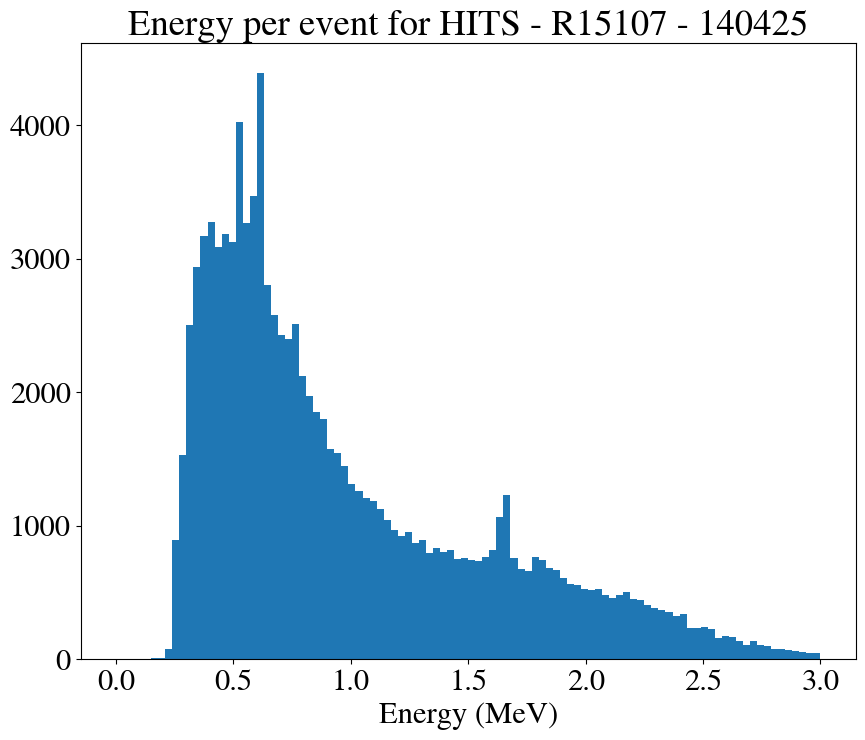

In [6]:
plt.hist(hdst.groupby('event').E.sum(), bins = 100, range = (0,3))
plt.title(f'Energy per event for HITS - R{RUN_NUMBER} - {TIMESTAMP}')
plt.xlabel('Energy (MeV)')

# Checkout events to make sure they look normal.

In [16]:
display(hdst.event.unique())

array([   2767,    2865,    2963, ..., 2328146, 2328160, 2328174])

EVENT 2767
Total energy 2.34 MeV



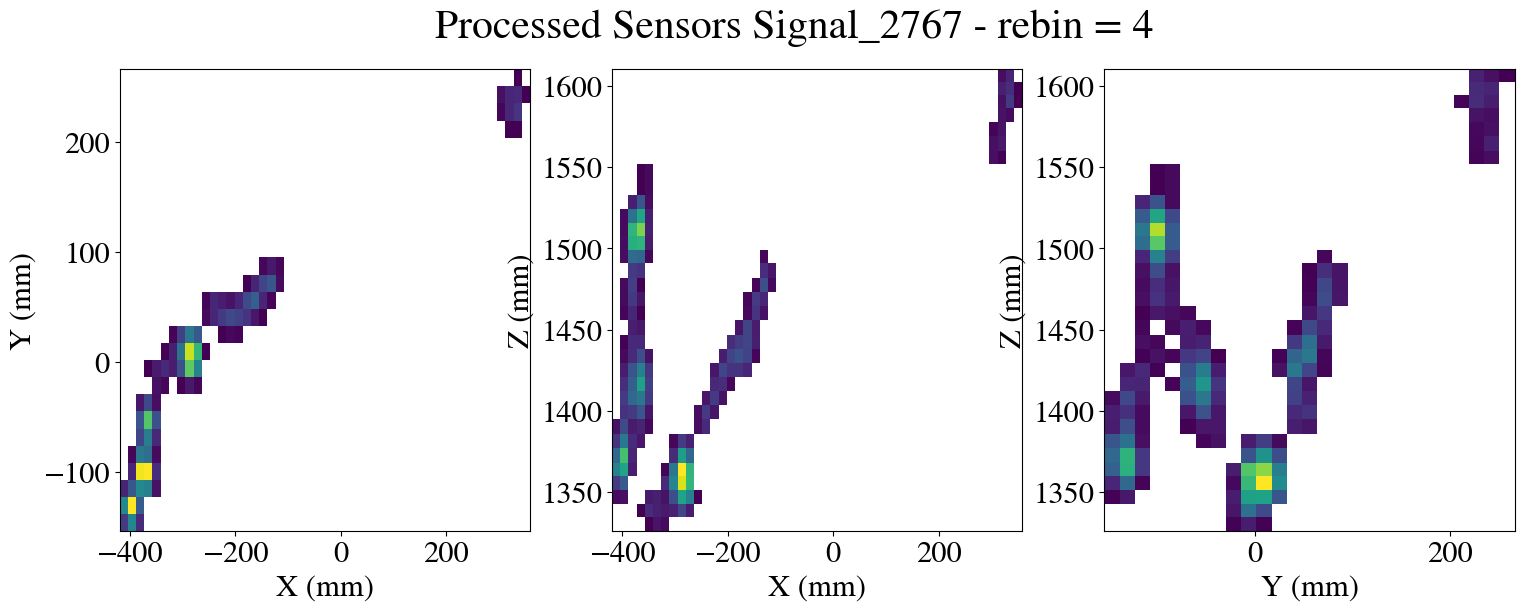

EVENT 2865
Total energy 1.00 MeV



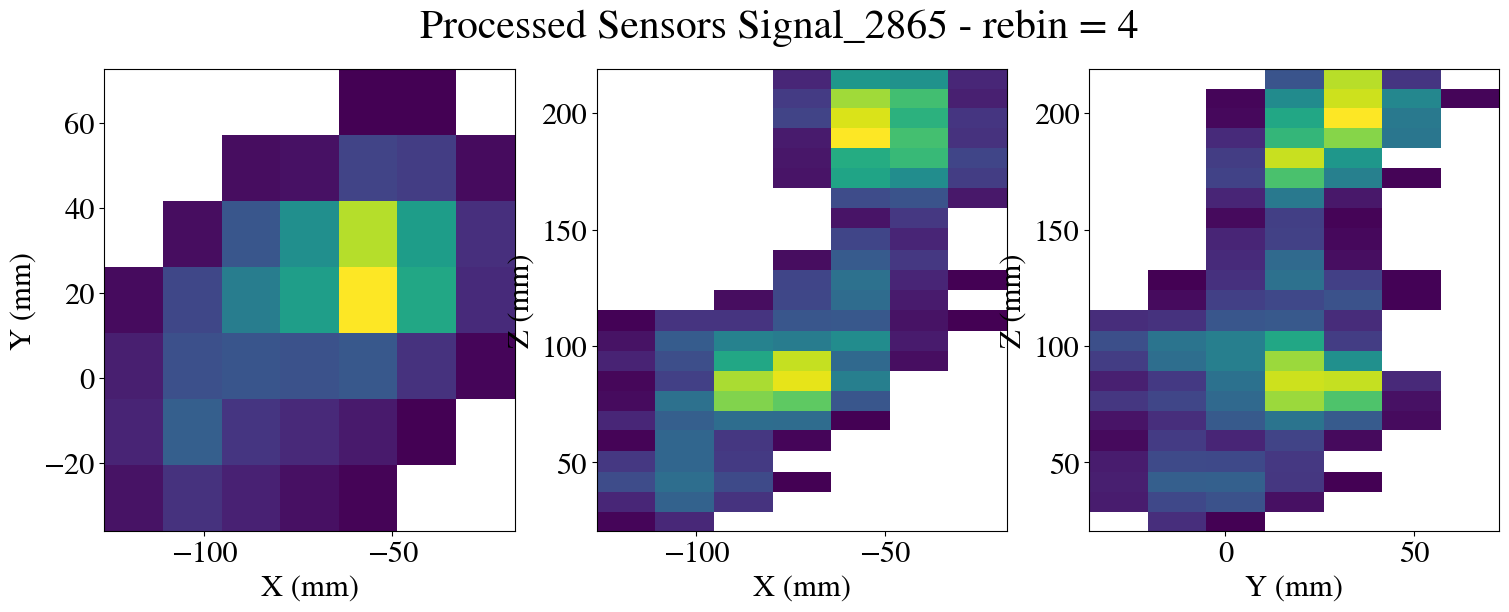

EVENT 2963
Total energy 2.75 MeV



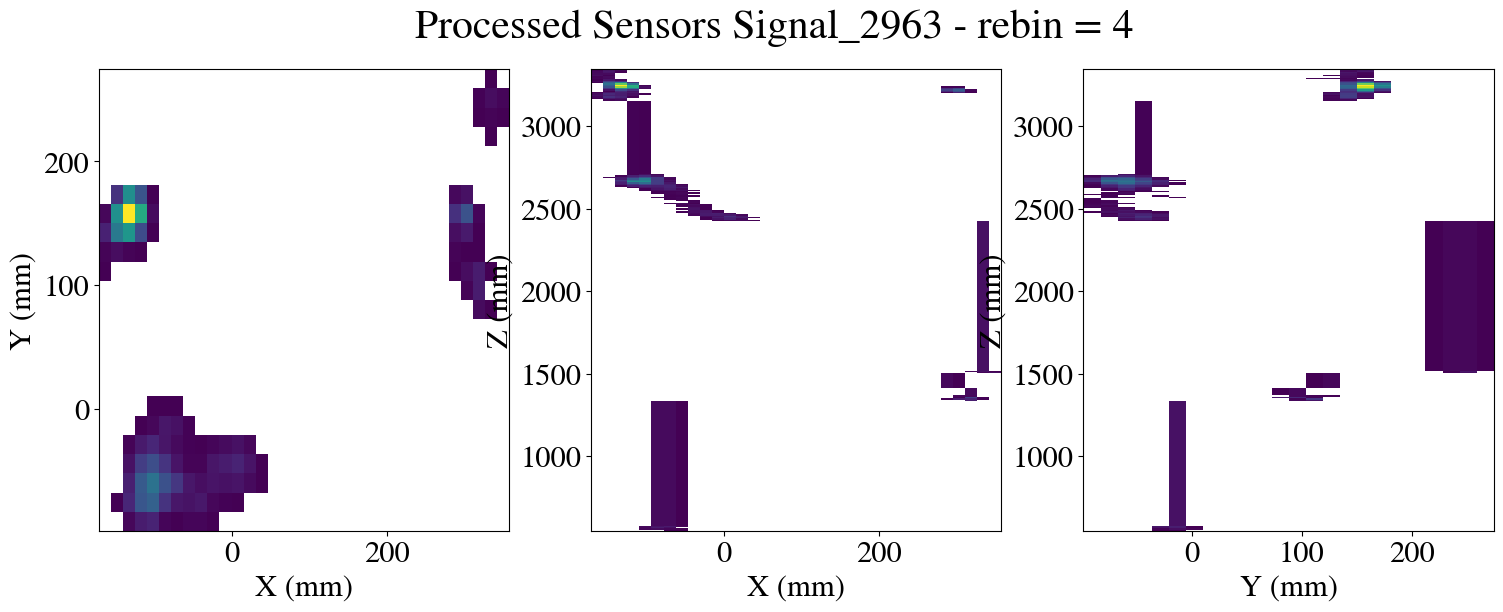

EVENT 3096
Total energy 0.27 MeV



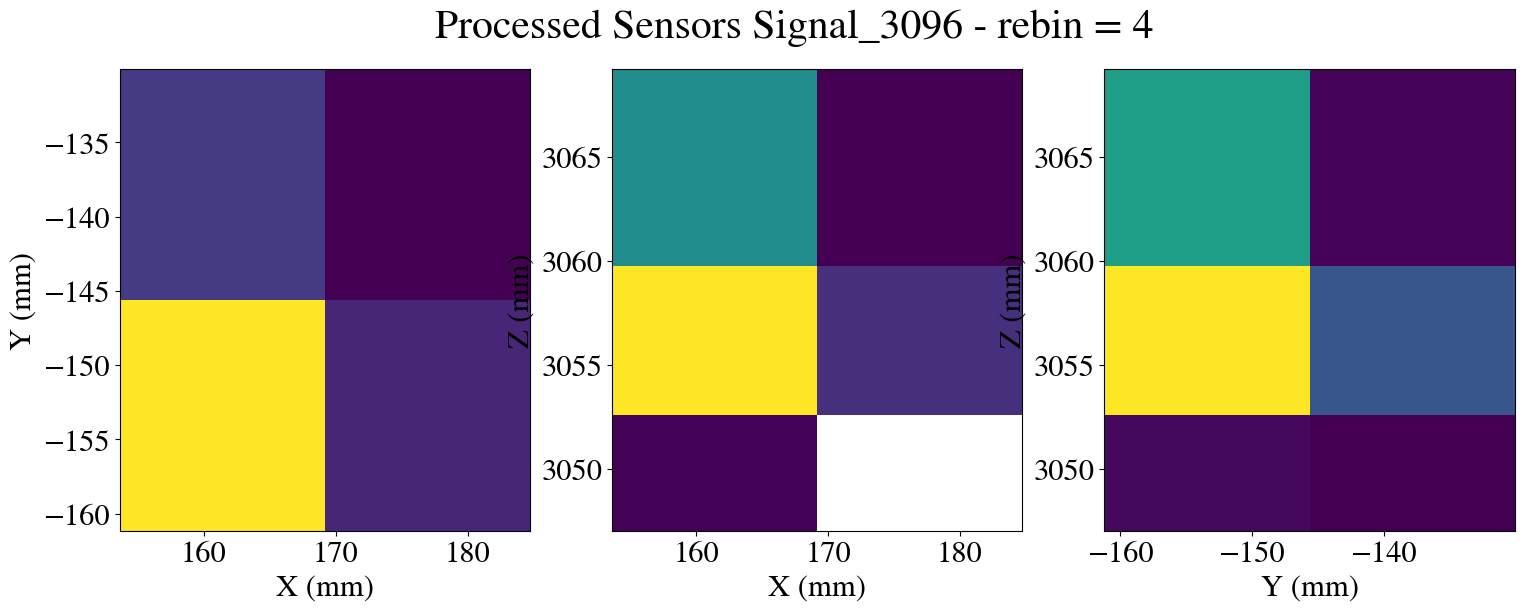

EVENT 3103
Total energy 1.95 MeV



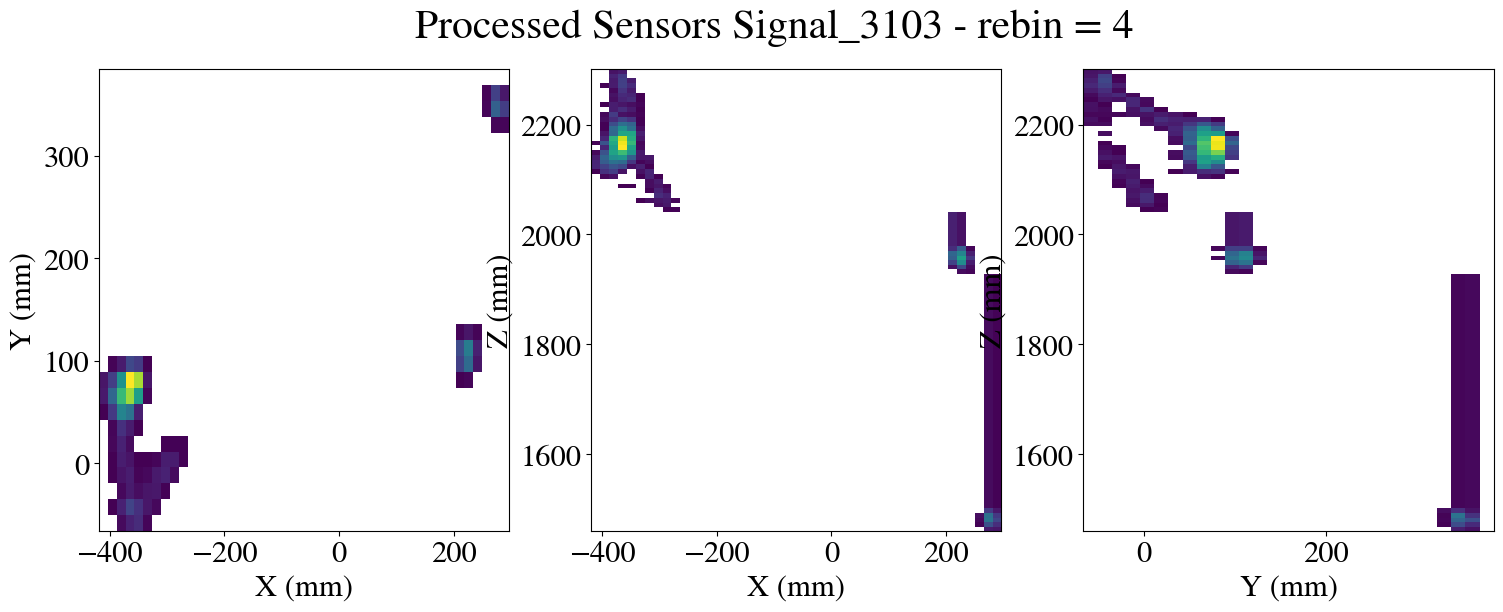

EVENT 3201
Total energy 0.68 MeV



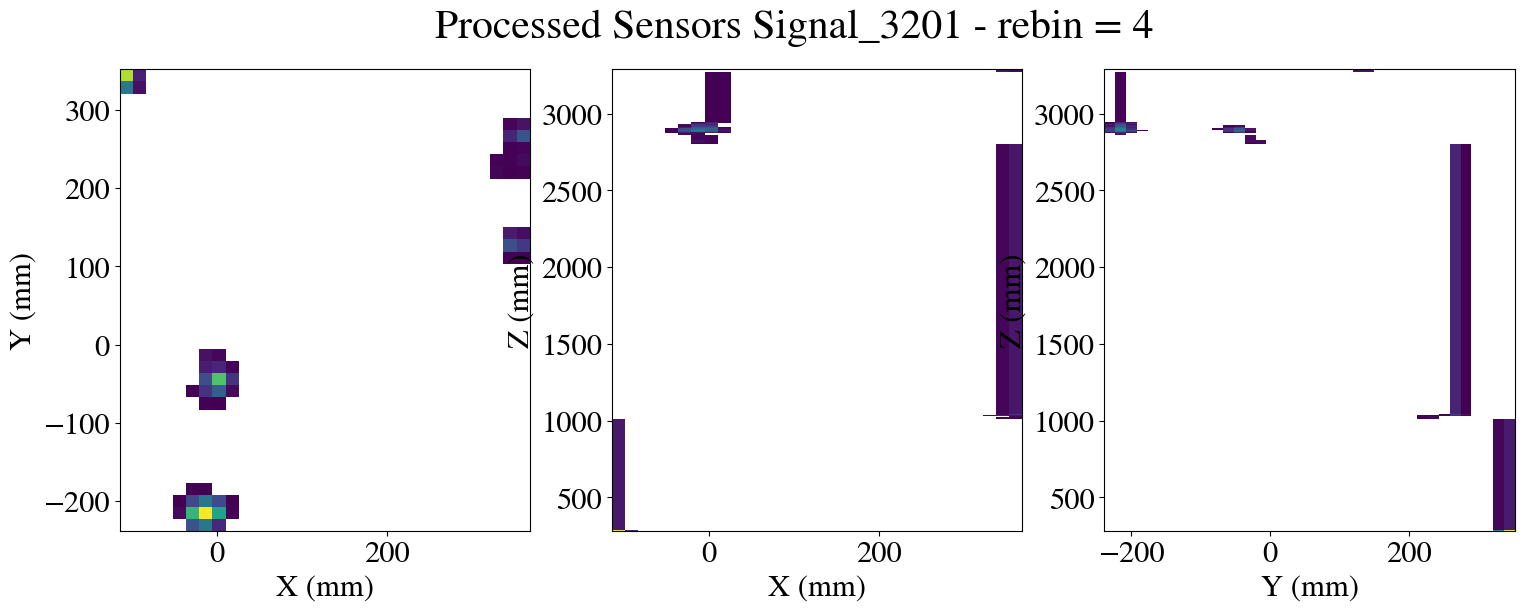

EVENT 3222
Total energy 0.64 MeV



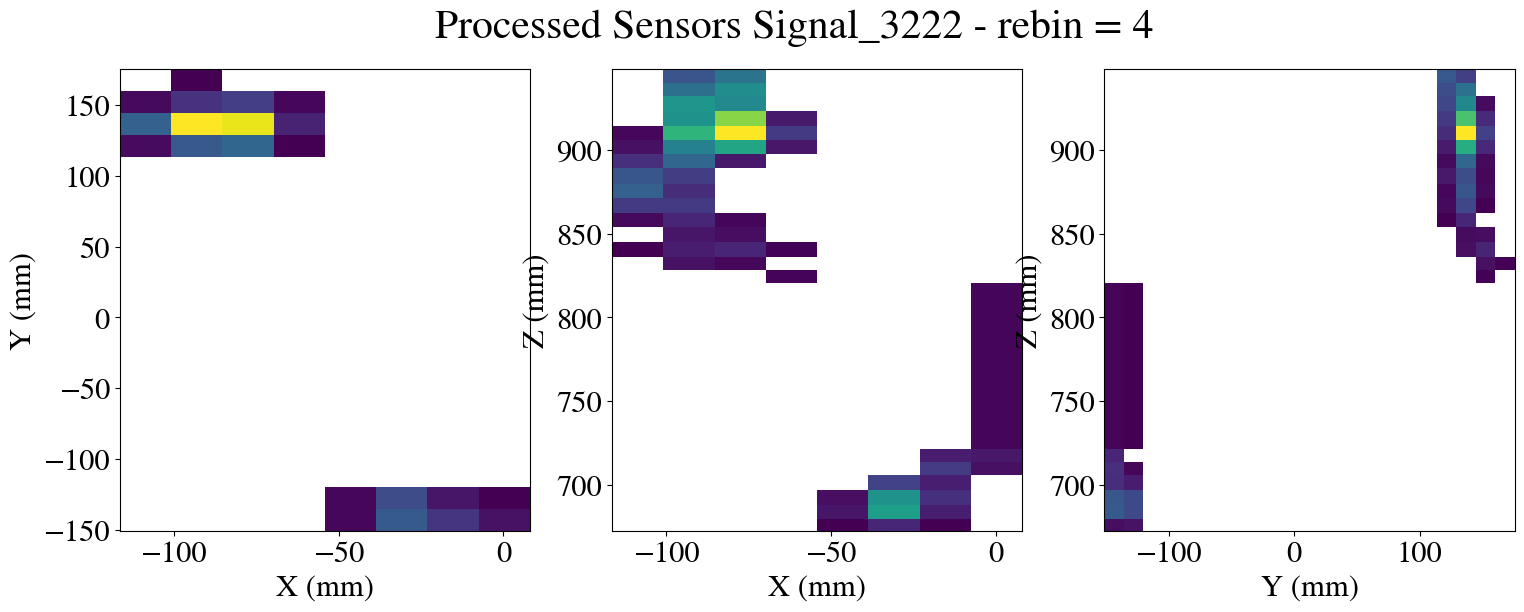

EVENT 3299
Total energy 0.87 MeV



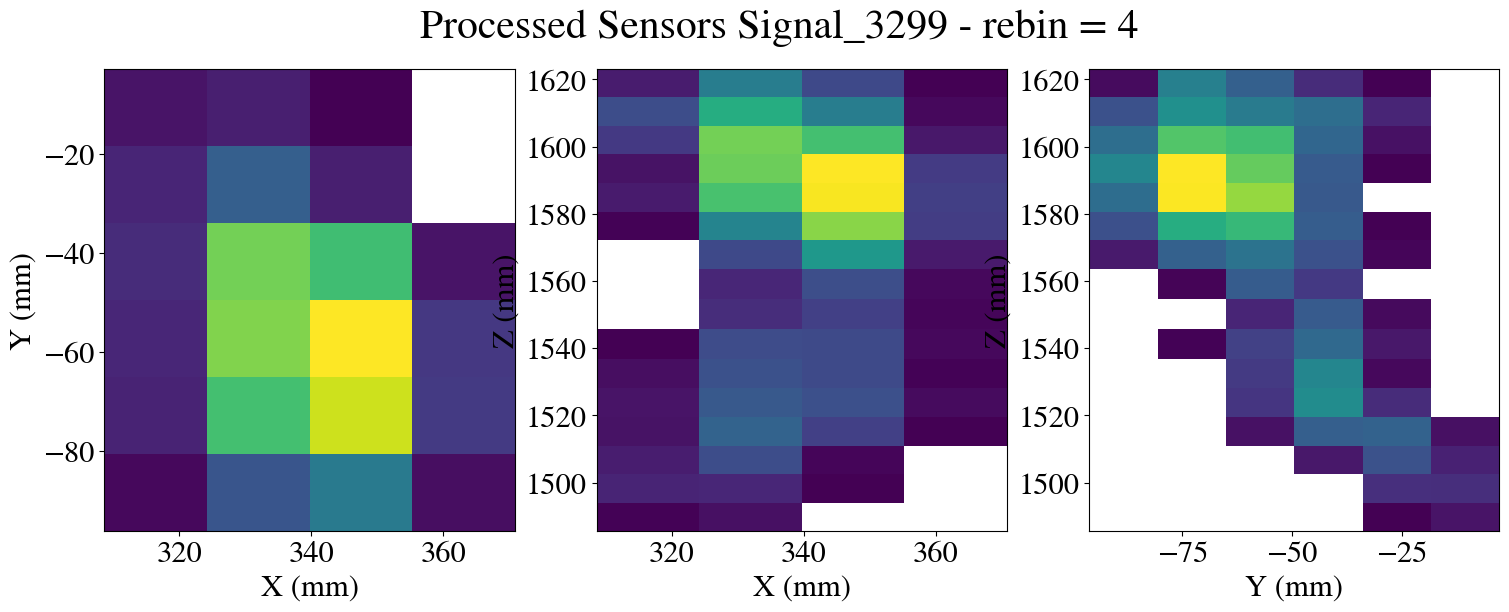

EVENT 2410
Total energy 0.62 MeV



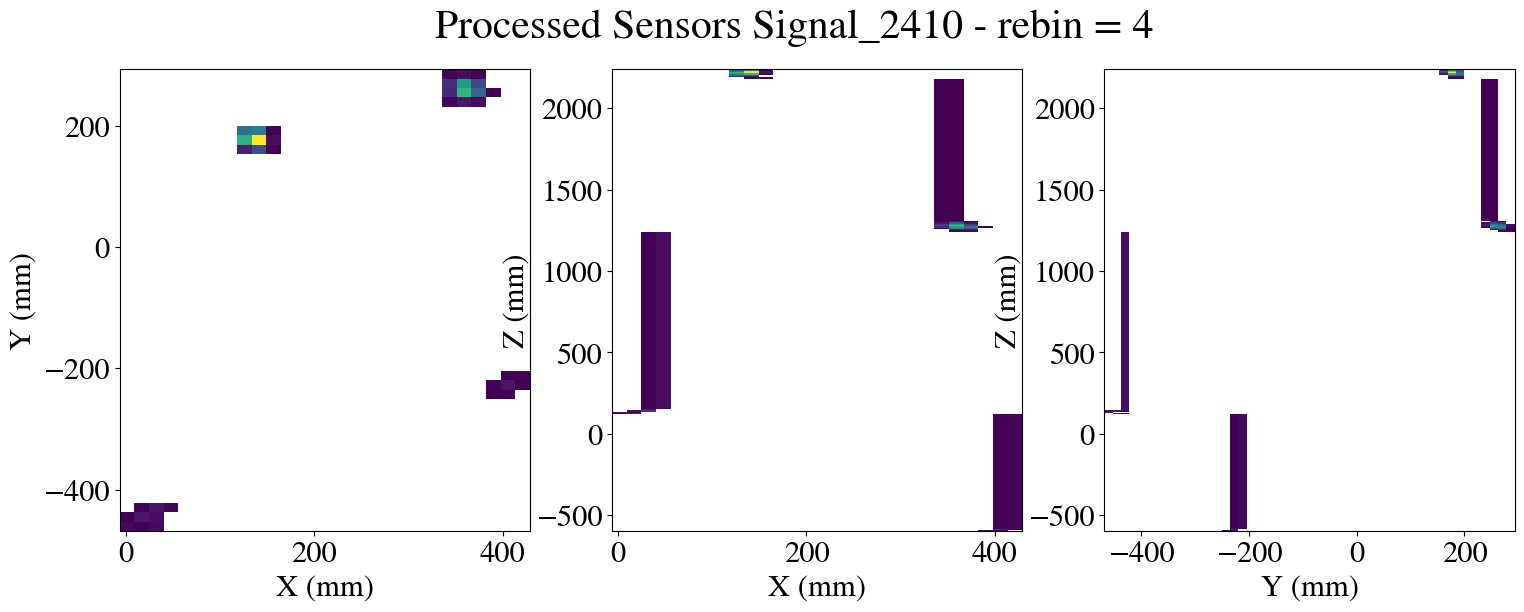

EVENT 2578
Total energy 0.77 MeV



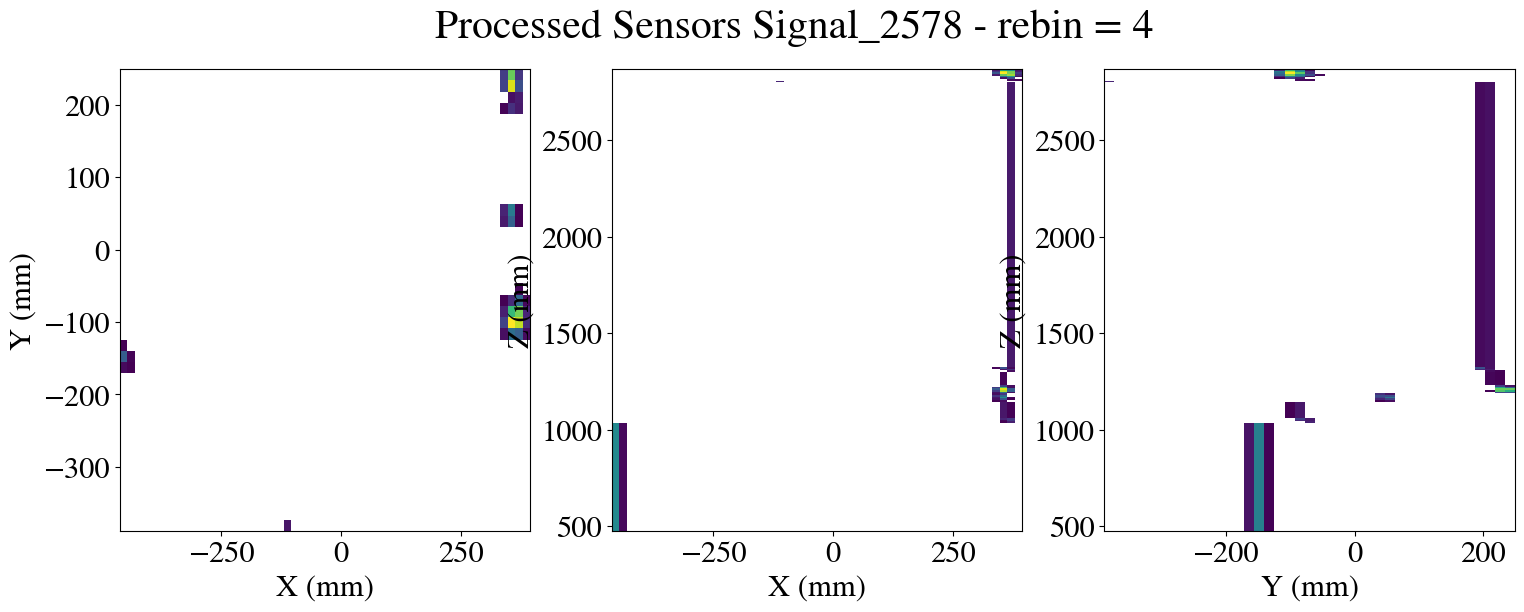

EVENT 3467
Total energy 0.40 MeV



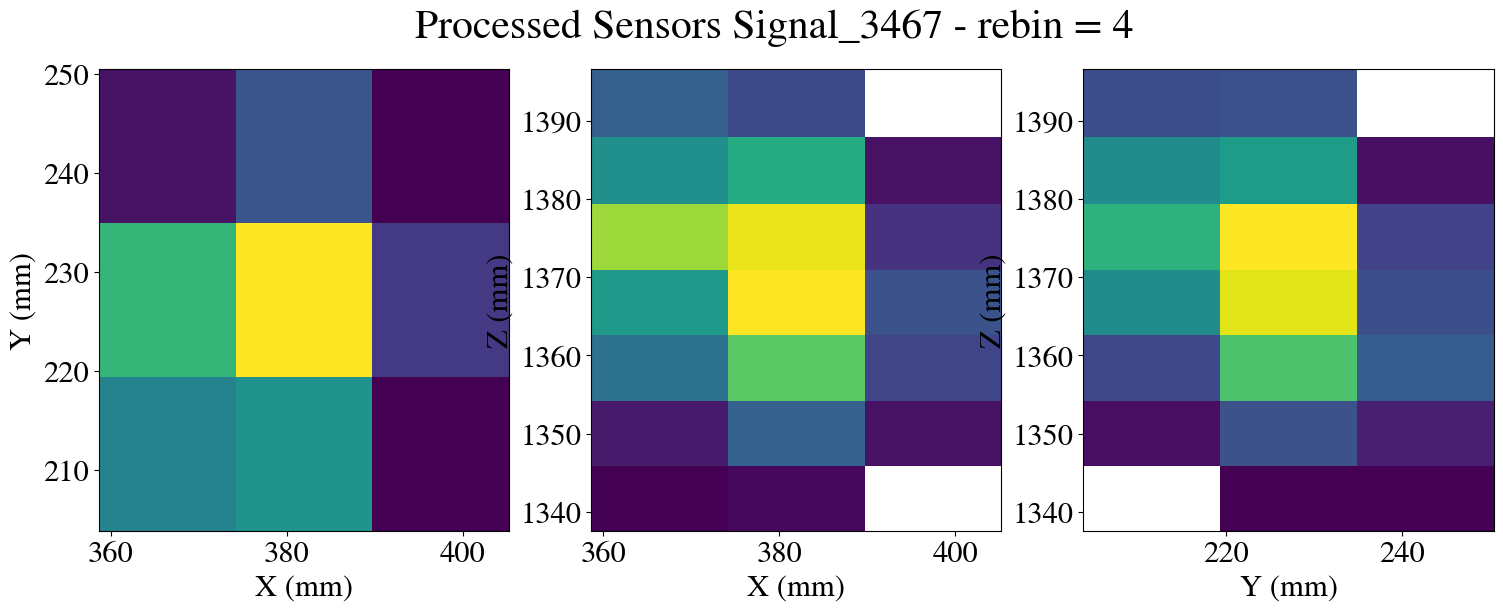

EVENT 3656
Total energy 0.87 MeV



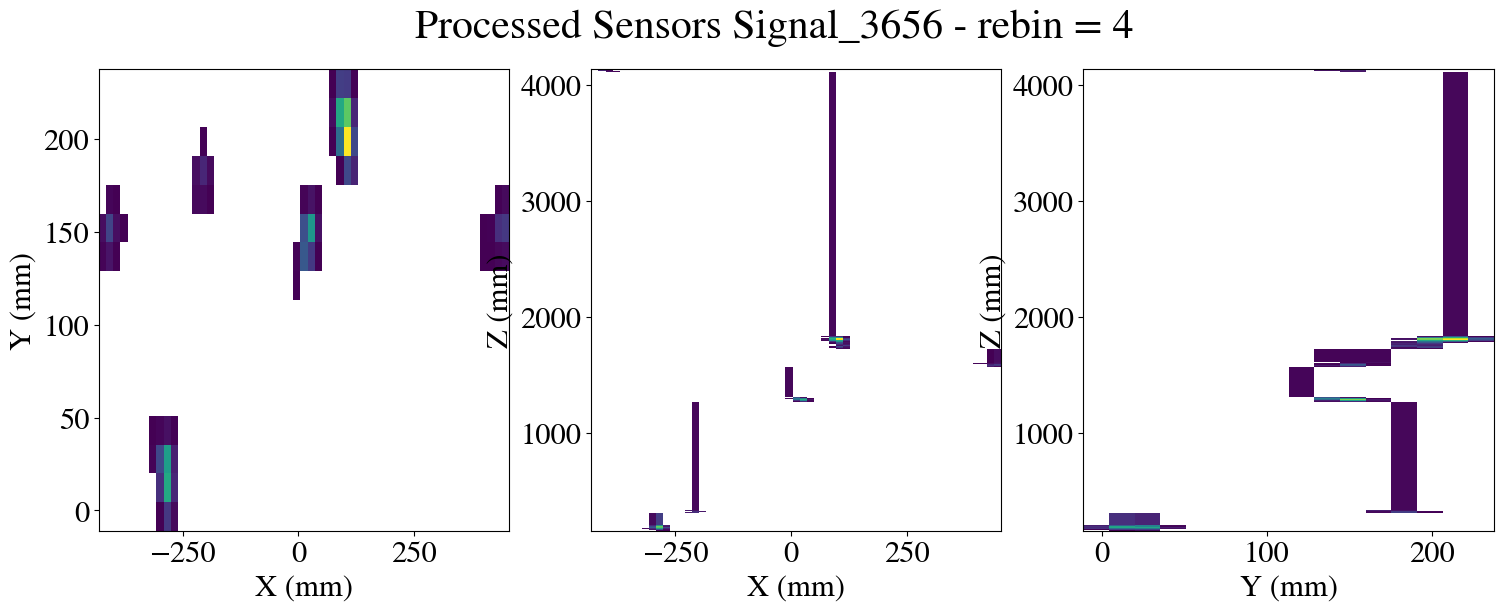

EVENT 3684
Total energy 0.76 MeV



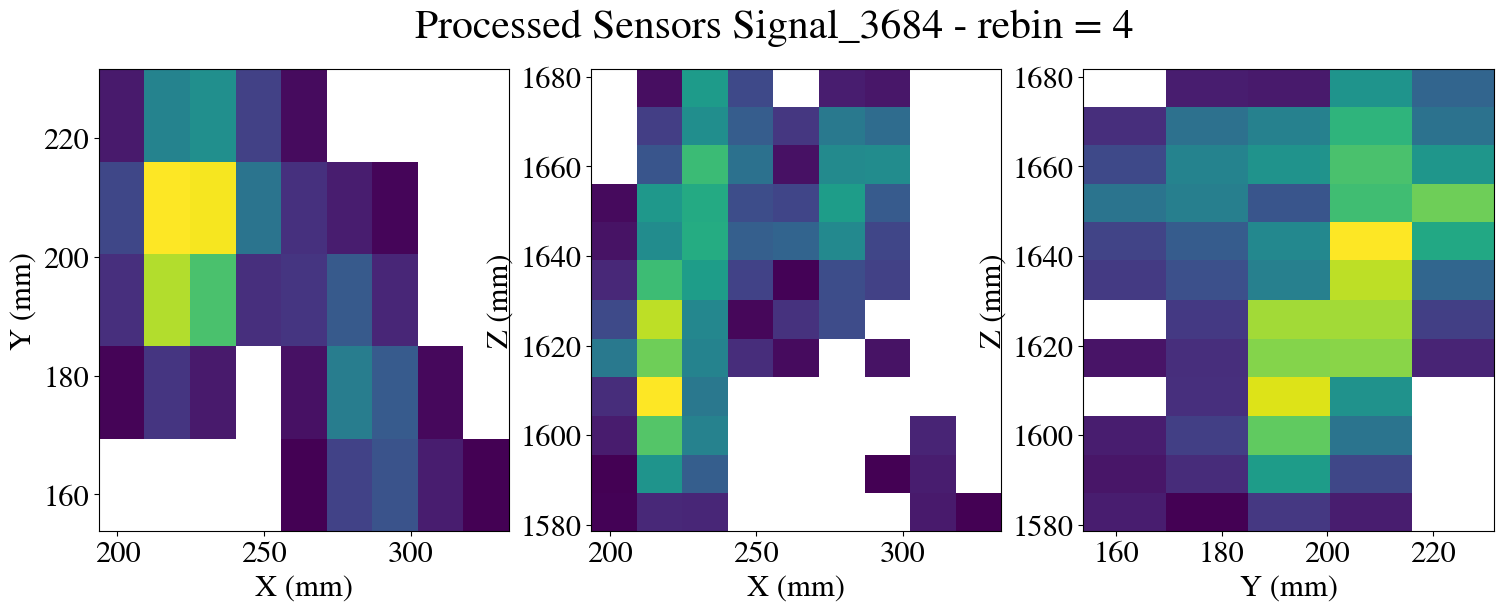

EVENT 3698
Total energy 1.80 MeV



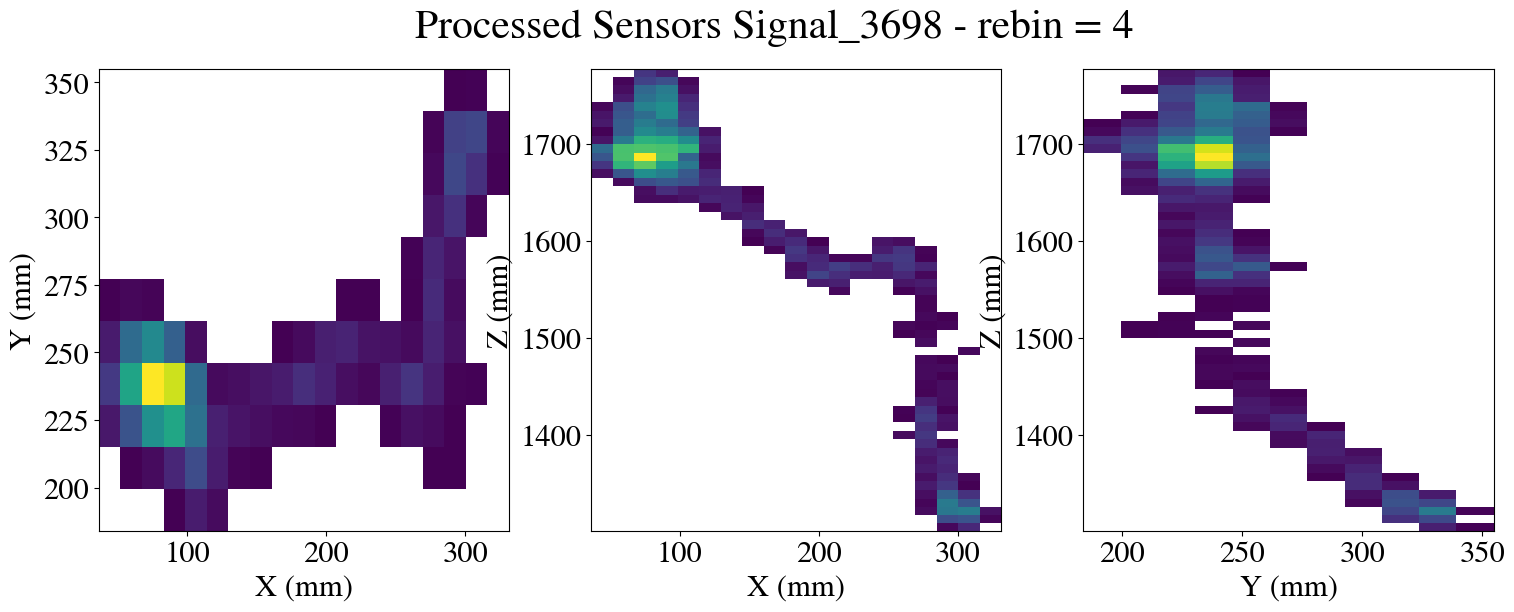

EVENT 3740
Total energy 1.21 MeV



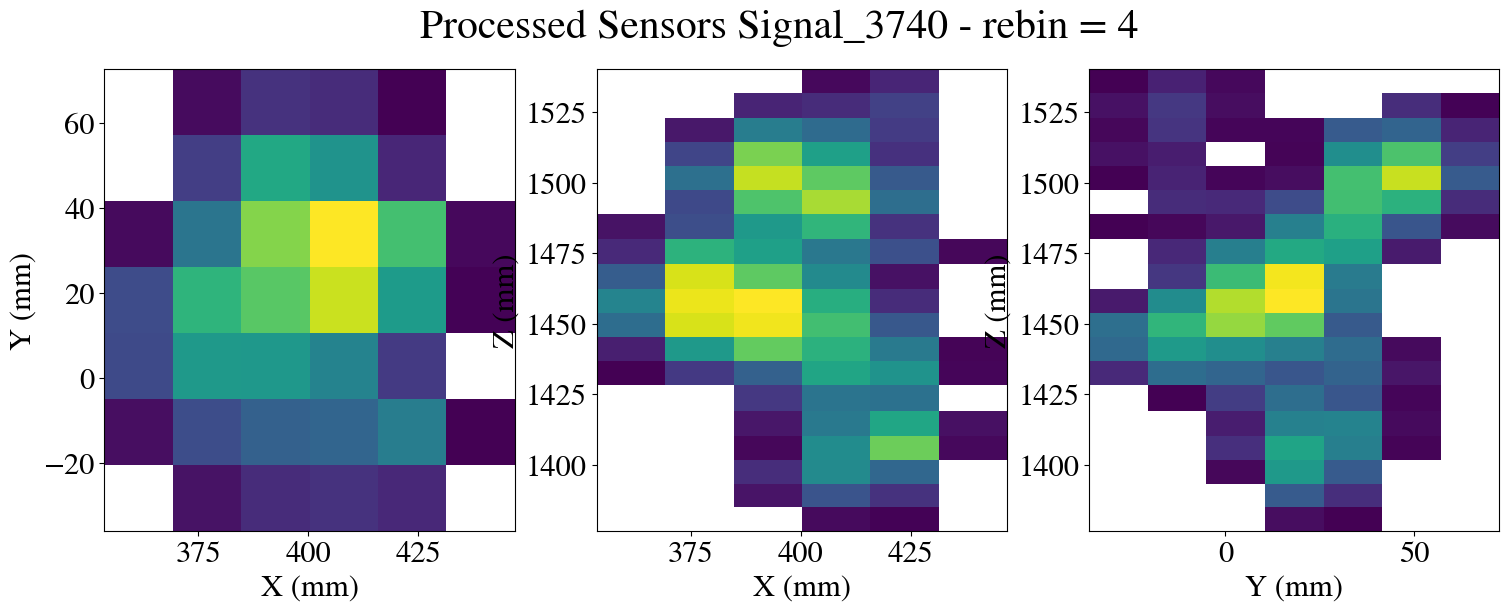

EVENT 3775
Total energy 0.61 MeV



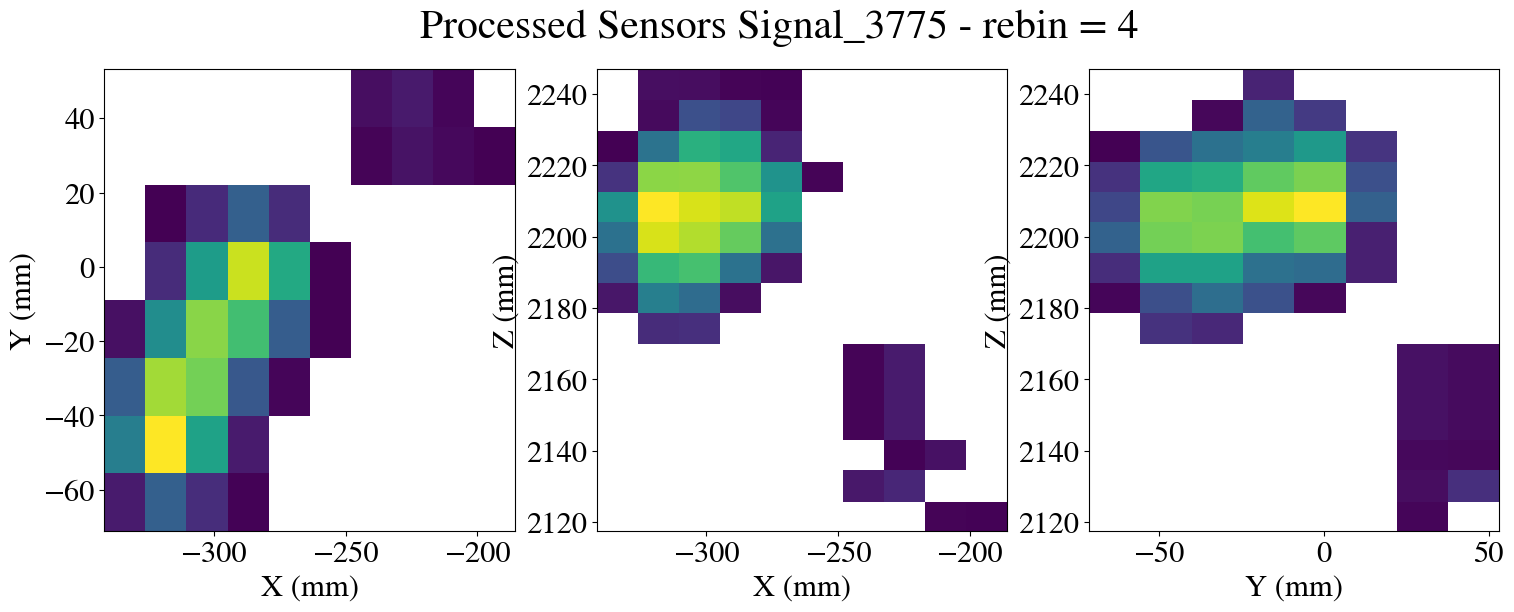

EVENT 3901
Total energy 0.40 MeV



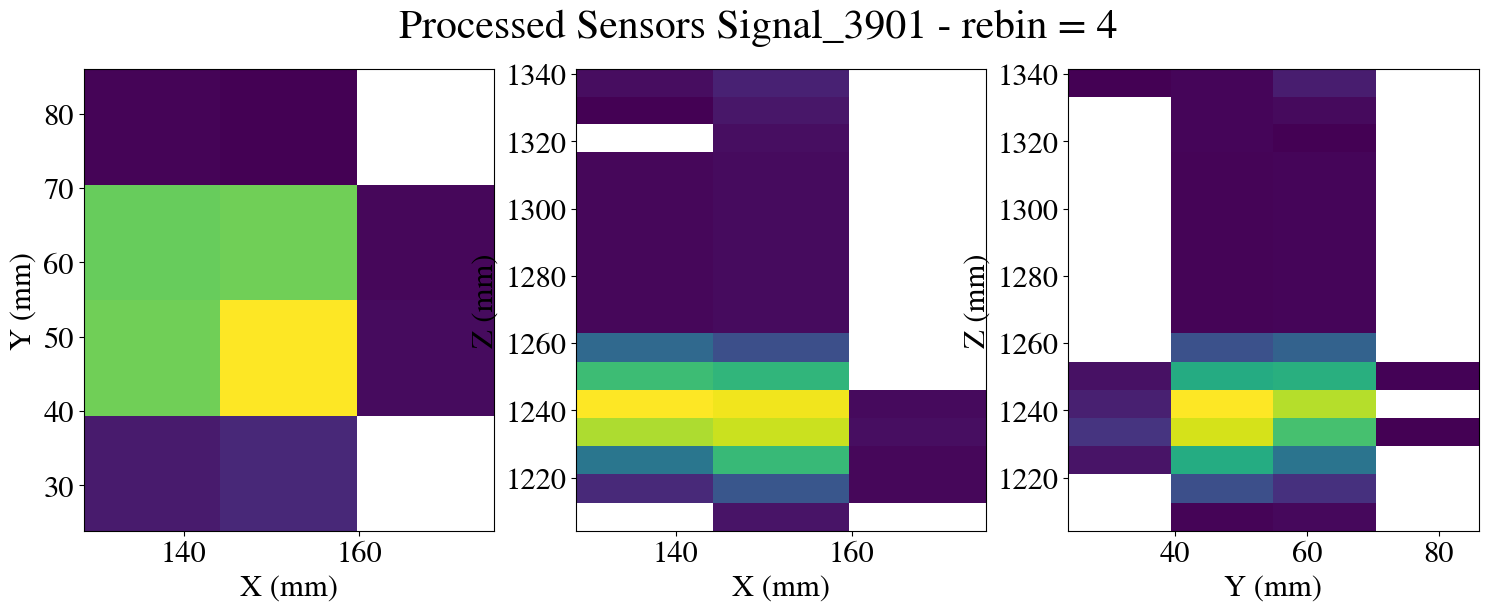

EVENT 3908
Total energy 2.31 MeV



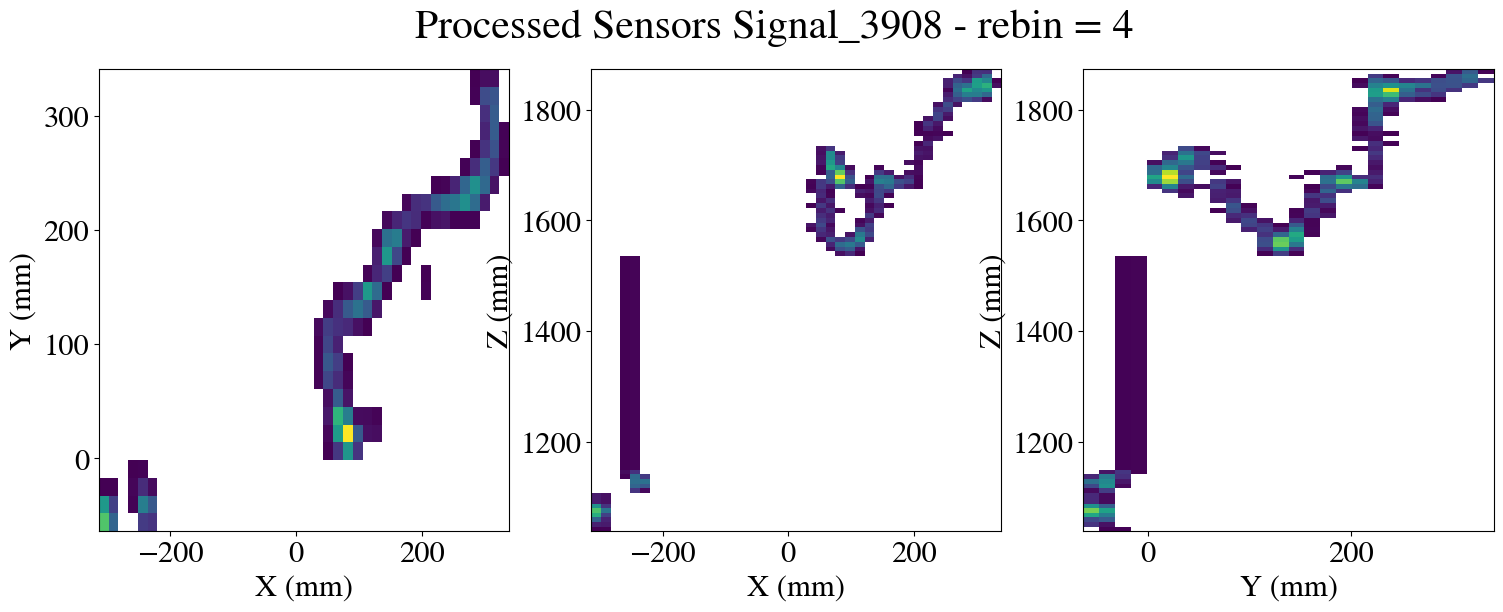

EVENT 4020
Total energy 2.33 MeV



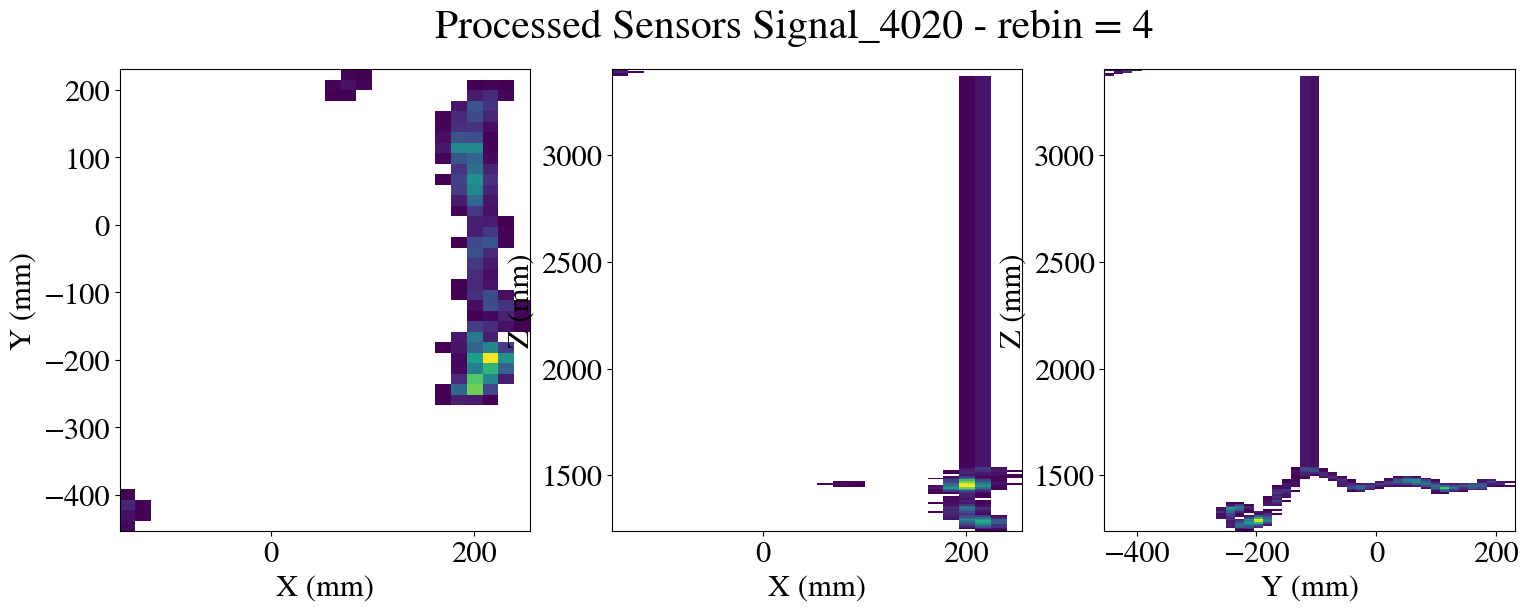

EVENT 8570
Total energy 0.51 MeV



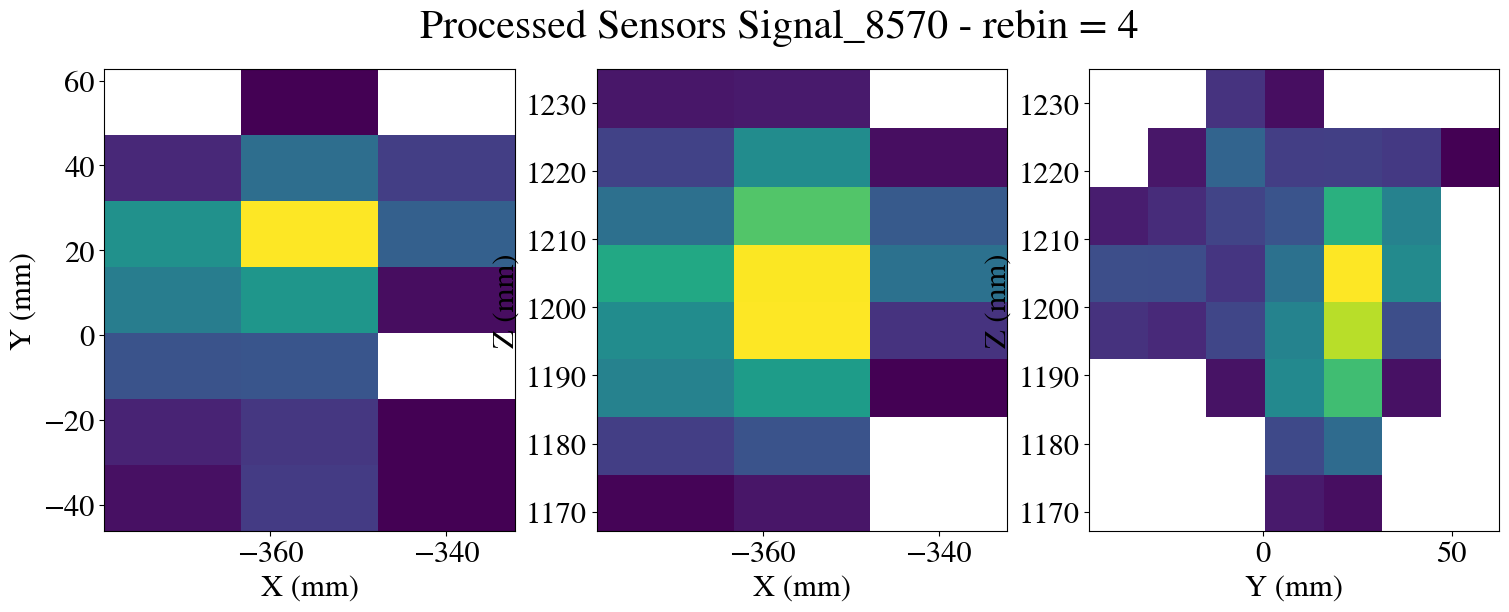

EVENT 8822
Total energy 0.37 MeV



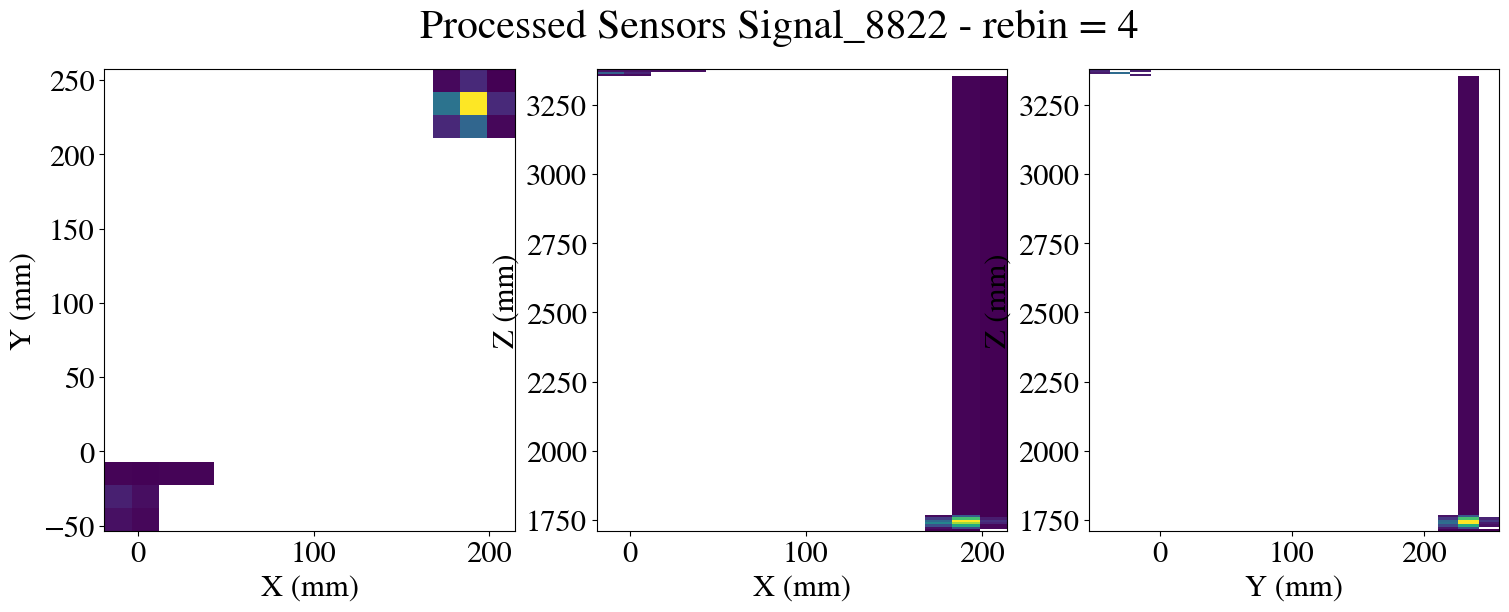

EVENT 6134
Total energy 1.53 MeV



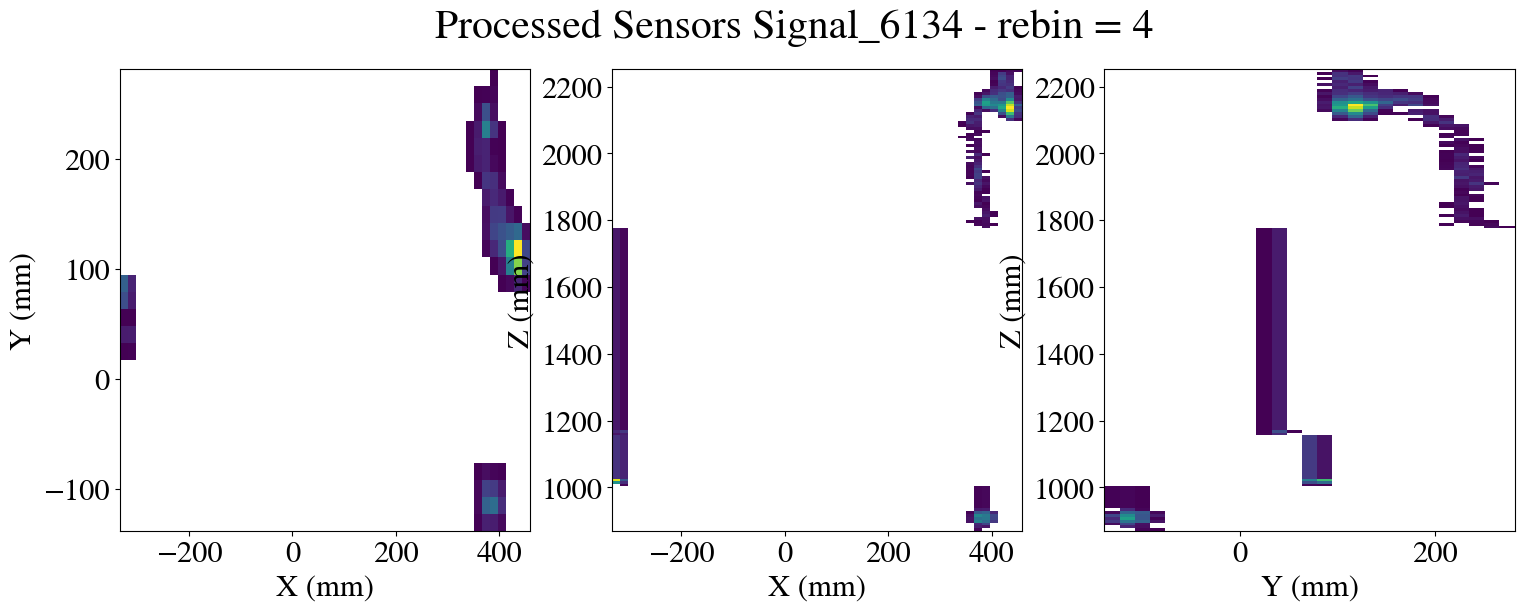

In [25]:
stopper = 20
for i, ev in enumerate(hdst.event.unique()):
    func.plotter(hdst, ev, deconv = True, cut_n_drop = False)
    if i > stopper:
        break